In [1]:
import sqlite3 as sl

conn = sl.connect('my-test.sqlite')

In [2]:
conn.execute("""
    CREATE TABLE USER (
        id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        age INTEGER
    );
""")

In [3]:
sql = 'INSERT INTO USER (id, name, age) values(?, ?, ?)'
data = [
    (1, 'Alice', 21),
    (2, 'Bob', 22),
    (3, 'Chris', 23)
]

In [4]:
conn.executemany(sql, data)

In [5]:
data = conn.execute('SELECT * FROM USER WHERE age <= 22')
for row in data:
    print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [6]:
import pandas as pd

df_skill = pd.DataFrame({
    'user_id': [1, 1, 2, 2, 3, 3, 3],
    'skill': ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning']
})

In [7]:
df_skill.to_sql('SKILL', conn)

df = pd.read_sql("""
    SELECT s.user_id, u.name, u.age, s.skill
    FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id
""", conn)

df

,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


In [8]:
df.to_sql('USER_SKILL', conn)

In [9]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

In [10]:
%sql sqlite:///demo.sqlite

'Connected: @demo.sqlite'

In [11]:
%sql SELECT date('now');

 * sqlite:///demo.sqlite
Done.


date('now')
2022-11-09


In [12]:
%sql SELECT date('now', 'start of month', '+1 month', '-1 day')

 * sqlite:///demo.sqlite
Done.


"date('now', 'start of month', '+1 month', '-1 day')"
2022-11-30


In [13]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [14]:
def dt(days):
  return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
  timestamp = now - dt(days=(N_rows - i))
  temperature = uniform(18, 26)
  %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows affected.
 * sqlite:///demo.sqlite
1 rows af

In [15]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.sqlite
Done.


Date,Temperature
2021-06-27 09:29:49,22.011710789027585
2021-06-28 09:29:49,22.003062478193165
2021-06-29 09:29:49,19.30891845809025
2021-06-30 09:29:49,23.647694607743546
2021-07-01 09:29:49,18.246845641766075


In [16]:
%%sql sqlite://
SELECT Timestamp as Date, temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-06-27 09:29:49.340096,22.011710789027585
2021-06-28 09:29:49.340096,22.003062478193165
2021-06-29 09:29:49.340096,19.30891845809025
2021-06-30 09:29:49.340096,23.647694607743546
2021-07-01 09:29:49.340096,18.246845641766075
2021-07-02 09:29:49.340096,20.950107006890228
2021-07-03 09:29:49.340096,23.213493223127685
2021-07-04 09:29:49.340096,23.749401355200277
2021-07-05 09:29:49.340096,22.81973760792522
2021-07-06 09:29:49.340096,23.956475820976436


In [17]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-06-27 09:29:49.340096,22.011710789027585
2021-06-28 09:29:49.340096,22.003062478193165
2021-06-29 09:29:49.340096,19.30891845809025
2021-06-30 09:29:49.340096,23.647694607743546
2021-07-01 09:29:49.340096,18.246845641766075
2021-07-02 09:29:49.340096,20.950107006890228
2021-07-03 09:29:49.340096,23.213493223127685
2021-07-04 09:29:49.340096,23.749401355200277
2021-07-05 09:29:49.340096,22.81973760792522
2021-07-06 09:29:49.340096,23.956475820976436


In [18]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year,
  AVG(Temperature) AS MEAN_TMP,
  MAX(Temperature) AS MAX_TMP,
  MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,22.089849094820114,25.989359688532687,18.09902105529232
2022,22.174088410087904,25.963845190923777,18.03043642342304


In [19]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index('date', inplace = True)
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.sqlite
Done.


DatetimeIndex(['2021-06-27 09:29:49', '2021-06-28 09:29:49',
               '2021-06-29 09:29:49', '2021-06-30 09:29:49',
               '2021-07-01 09:29:49', '2021-07-02 09:29:49',
               '2021-07-03 09:29:49', '2021-07-04 09:29:49',
               '2021-07-05 09:29:49', '2021-07-06 09:29:49',
               ...
               '2022-10-30 09:29:49', '2022-10-31 09:29:49',
               '2022-11-01 09:29:49', '2022-11-02 09:29:49',
               '2022-11-03 09:29:49', '2022-11-04 09:29:49',
               '2022-11-05 09:29:49', '2022-11-06 09:29:49',
               '2022-11-07 09:29:49', '2022-11-08 09:29:49'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

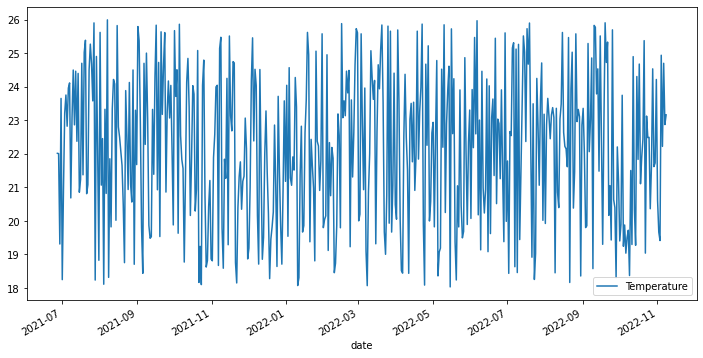

In [20]:
df.plot(figsize=(12, 6))